In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing import image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## We just need the X_train data set here for image recreation 

In [6]:
X_train_dir = "../../DataSets/wm-nowm/train/watermark/"


# Not used for image recreation
y_train_dir = "../../DataSets/wm-nowm/train/no-watermark/"

X_test_dir = "../../DataSets/wm-nowm/valid/watermark/"
y_test_dir = "../../DataSets/wm-nowm/valid/no-watermark/"

In [17]:
X_train = []
y_train = []

for filename in os.listdir(X_train_dir):
    if filename.endswith(".jpeg") and len(X_train) < 8000:
        img = image.load_img(X_train_dir+filename, target_size=(128, 128))
        X_train.append(image.img_to_array(img))
X_train = np.array(X_train)

# for filename in os.listdir(y_train_dir):
#     if filename.endswith(".jpeg"):
#         img = image.load_img(y_train_dir+filename, target_size=(128, 128))
#         y_train.append(image.img_to_array(img))
# y_train = np.array(y_train)

X_test = []
y_test = []

for filename in os.listdir(X_test_dir):
    if filename.endswith(".jpeg") and len(X_test) < 500:
        img = image.load_img(X_test_dir+filename, target_size=(128, 128))
        X_test.append(image.img_to_array(img))
X_test = np.array(X_test)

# for filename in os.listdir(y_test_dir):
#     if filename.endswith(".jpeg"):
#         img = image.load_img(y_test_dir+filename, target_size=(128, 128))
#         y_test.append(image.img_to_array(img))
# y_test = np.array(y_test)

In [19]:
print("X_train:", X_train.shape)
# print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
# print("y_test:", y_test.shape)

X_train: (8000, 128, 128, 3)
X_test: (500, 128, 128, 3)


# Model Traning

In [14]:
input_layer = Input(shape=(128, 128, 3))
x = Conv2D(16, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling2D(2)(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)

code_layer = MaxPooling2D(2)(x)

x = Conv2DTranspose(8, 3, activation='relu', padding='same')(code_layer)
x = UpSampling2D(2)(x)
x = Conv2DTranspose(8, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)
x = Conv2DTranspose(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)

output_layer = Conv2DTranspose(3, 3, padding='same')(x)

model = Model(input_layer, output_layer)

In [15]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

In [21]:
model.fit(X_train, X_train, epochs=20, batch_size=4, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20
2000/2000 [==============================] - 154s 76ms/step - loss: 820.9197 - val_loss: 750.7935
Epoch 2/20
2000/2000 [==============================] - 212s 106ms/step - loss: 740.0016 - val_loss: 716.9891
Epoch 3/20
2000/2000 [==============================] - 125s 62ms/step - loss: 706.2272 - val_loss: 683.7254
Epoch 4/20
2000/2000 [==============================] - 109s 54ms/step - loss: 688.1084 - val_loss: 683.8432
Epoch 5/20
2000/2000 [==============================] - 113s 56ms/step - loss: 675.0951 - val_loss: 675.8950
Epoch 6/20
2000/2000 [==============================] - 121s 61ms/step - loss: 653.7833 - val_loss: 610.4835
Epoch 7/20
2000/2000 [==============================] - 110s 55ms/step - loss: 624.7733 - val_loss: 610.6671
Epoch 8/20
2000/2000 [==============================] - 113s 56ms/step - loss: 615.9408 - val_loss: 586.7772
Epoch 9/20
2000/2000 [==============================] - 114s 57ms/step - loss: 609.4491 - val_loss: 607.2503
Epoch 10/20
2000/2

In [22]:
pred = model.predict(X_test)

16/16 [==============================] - 2s 113ms/step


In [46]:
def show_data(X, n=10, title=""):
    plt.figure(figsize=(20,10))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(image.array_to_img(X[i+100]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize=20)

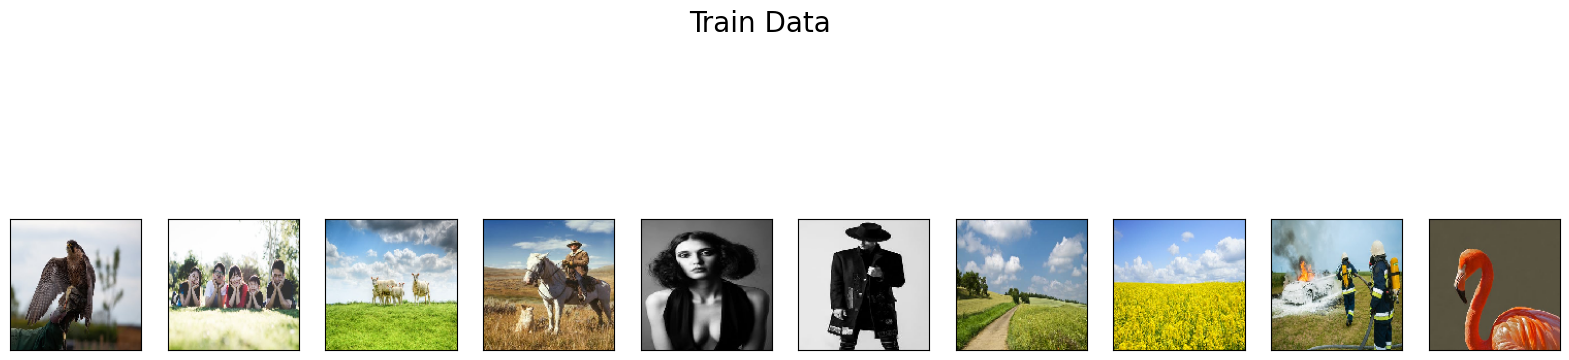

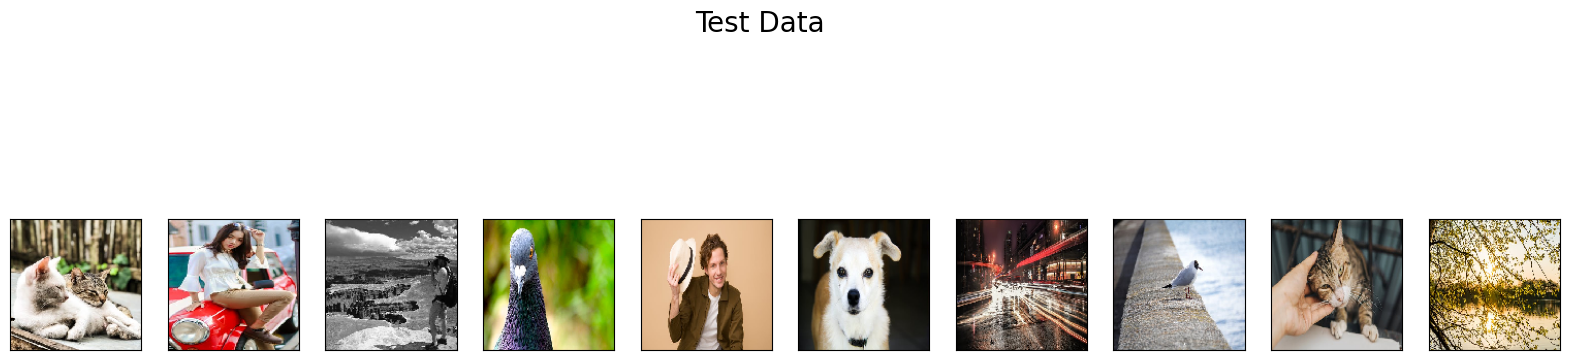

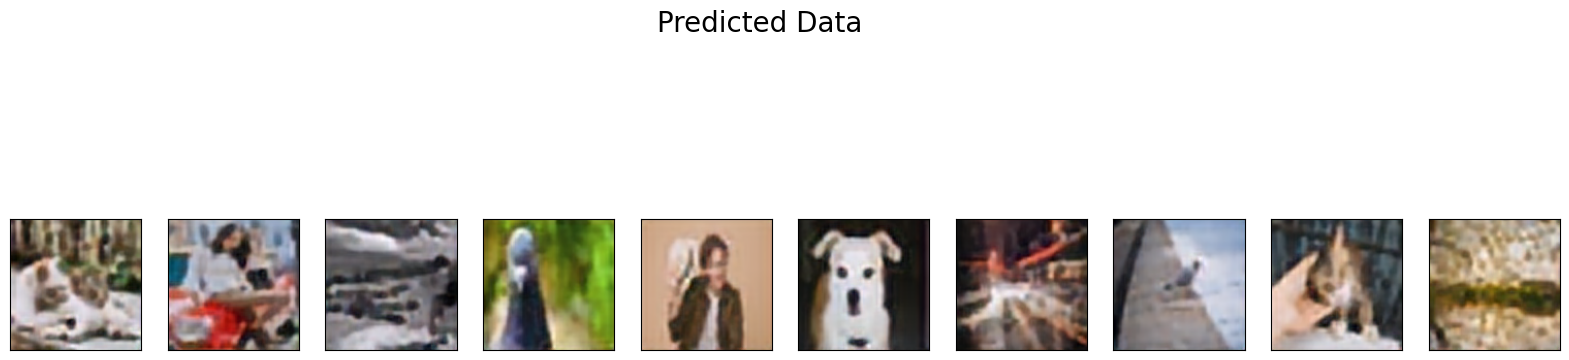

In [47]:
show_data(X_train, title="Train Data")
show_data(X_test, title="Test Data")
show_data(pred, title="Predicted Data")
